In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
#Load the data
dataset = pd.read_csv("C:/Users/User/Desktop/models/portmap.csv")

C:\Users\User\AppData\Local\Temp\ipykernel_7028\2180947773.py:2: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("C:/Users/User/Desktop/models/portmap.csv")


In [3]:
dataset.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,24,192.168.50.254-224.0.0.5-0-0-0,192.168.50.254,0,224.0.0.5,0,0,18:17.0,114456999,45,...,28337.11229,98168,3,9529897.25,351582.6313,10001143,9048097,0,0,BENIGN
1,26,192.168.50.253-224.0.0.5-0-0-0,192.168.50.253,0,224.0.0.5,0,0,18:18.5,114347504,56,...,121314.91190,420255,4,9493929.75,351541.0795,9978130,8820294,0,0,BENIGN
2,176563,172.217.10.98-192.168.50.6-443-54799-6,192.168.50.6,54799,172.217.10.98,443,6,18:18.6,36435473,6,...,0.00000,62416,62416,36373056.00,0.0000,36373056,36373056,0,0,BENIGN
3,50762,172.217.7.2-192.168.50.6-443-54800-6,192.168.50.6,54800,172.217.7.2,443,6,18:18.6,36434705,6,...,0.00000,62413,62413,36372291.00,0.0000,36372291,36372291,0,0,BENIGN
4,87149,172.217.10.98-192.168.50.6-443-54801-6,192.168.50.6,54801,172.217.10.98,443,6,18:18.6,36434626,6,...,0.00000,62409,62409,36372216.00,0.0000,36372216,36372216,0,0,BENIGN


In [4]:
dataset.columns

Index(['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Len

In [5]:
dataset.shape

(191694, 88)

In [6]:
dataset.describe()

,Unnamed: 0,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
count,191694.000000,191694.000000,191694.000000,191694.000000,1.916940e+05,191694.000000,191694.000000,191694.000000,1.916940e+05,191694.000000,...,1.916940e+05,1.916940e+05,1.916940e+05,1.916940e+05,1.916940e+05,1.916940e+05,1.916940e+05,1.916940e+05,1.916940e+05,191694.000000
mean,95846.500000,2088.157068,32152.417843,16.799915,3.429798e+05,2.269868,0.381493,470.704451,4.068446e+02,228.300849,...,-9.895723e+06,3.125842e+03,1.714300e+03,5.498896e+03,2.033322e+03,1.178584e+05,7.717813e+03,1.256591e+05,1.110960e+05,0.977146
std,55337.435588,8566.647296,19319.329351,1.485127,5.957307e+06,46.812214,72.545552,684.066594,1.335419e+05,74.193653,...,1.020711e+08,1.124319e+05,8.231591e+04,2.069510e+05,9.520603e+04,2.384008e+06,3.836531e+05,2.502066e+06,2.326992e+06,0.149439
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,...,-1.062719e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,47923.250000,648.000000,15376.500000,17.000000,1.000000e+00,2.000000,0.000000,458.000000,0.000000e+00,229.000000,...,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
50%,95846.500000,651.000000,32215.000000,17.000000,1.000000e+00,2.000000,0.000000,458.000000,0.000000e+00,229.000000,...,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
75%,143769.750000,846.000000,48947.000000,17.000000,1.000000e+00,2.000000,0.000000,458.000000,0.000000e+00,229.000000,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
max,191693.000000,65528.000000,65535.000000,17.000000,1.199474e+08,20444.000000,31700.000000,150726.000000,5.842950e+07,3583.000000,...,4.400000e+01,1.400653e+07,2.135244e+07,4.553668e+07,1.113396e+07,8.279180e+07,3.475561e+07,8.279180e+07,8.279180e+07,1.000000


In [7]:
# Drop Unnamed:0
dataset = dataset.drop(['Unnamed: 0'], axis = 1)

In [8]:
dataset.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,192.168.50.254-224.0.0.5-0-0-0,192.168.50.254,0,224.0.0.5,0,0,18:17.0,114456999,45,0,...,28337.11229,98168,3,9529897.25,351582.6313,10001143,9048097,0,0,BENIGN
1,192.168.50.253-224.0.0.5-0-0-0,192.168.50.253,0,224.0.0.5,0,0,18:18.5,114347504,56,0,...,121314.91190,420255,4,9493929.75,351541.0795,9978130,8820294,0,0,BENIGN
2,172.217.10.98-192.168.50.6-443-54799-6,192.168.50.6,54799,172.217.10.98,443,6,18:18.6,36435473,6,2,...,0.00000,62416,62416,36373056.00,0.0000,36373056,36373056,0,0,BENIGN
3,172.217.7.2-192.168.50.6-443-54800-6,192.168.50.6,54800,172.217.7.2,443,6,18:18.6,36434705,6,2,...,0.00000,62413,62413,36372291.00,0.0000,36372291,36372291,0,0,BENIGN
4,172.217.10.98-192.168.50.6-443-54801-6,192.168.50.6,54801,172.217.10.98,443,6,18:18.6,36434626,6,2,...,0.00000,62409,62409,36372216.00,0.0000,36372216,36372216,0,0,BENIGN


In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df=pd

In [11]:
X = dataset.iloc[:, [3, 4]].values

In [12]:
y = dataset.iloc[:, 3].values

In [13]:
# Splitting the dataset into the Training set and Test set

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [15]:
# Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
sc_X = StandardScaler()

In [18]:
sc_y = StandardScaler()

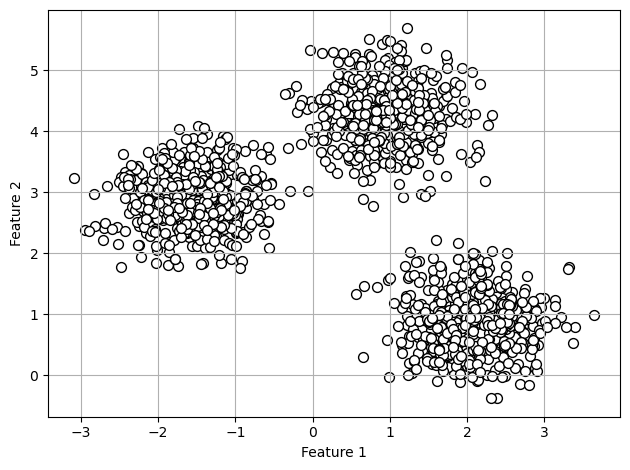

In [19]:
# Create 3 clusters with 150 randomly generated data points and 4 features
X,y = make_blobs(n_samples=1500, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0)

# Plot the points as a scatterplot
plt.scatter(X[:,0], X[:, 1], c="white", marker="o", edgecolor="black", s=50)

# Write labels, show grid and plot
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid()
plt.tight_layout()
plt.show()

In [20]:
# Using the elbow method to find the optimal number of clusters

In [21]:
from sklearn.cluster import KMeans

In [22]:
wcss = []

In [23]:
for i in range(1, 11): kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42, n_init='auto')
kmeans.fit(X)

KMeans(n_clusters=10, n_init='auto', random_state=42)

In [24]:
# Fitting K-Means to the dataset

In [25]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [26]:
# Visualising the clusters

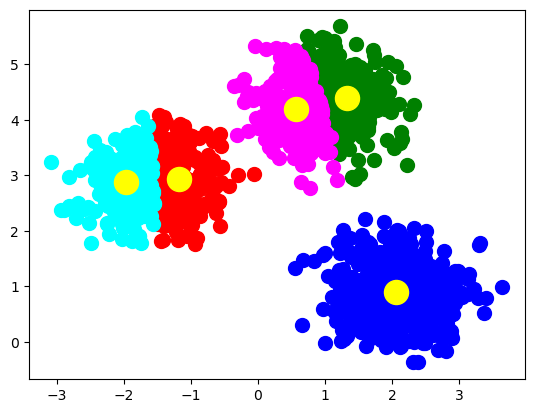

In [27]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

In [28]:
# Classification Report

In [29]:
from sklearn.metrics import classification_report

In [30]:
from sklearn.datasets import make_classification

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
from sklearn.naive_bayes import MultinomialNB

In [35]:
X = dataset.iloc[:, [3, 4]].values

In [36]:
y = dataset.iloc[:, 3].values

In [37]:
cv = CountVectorizer()

In [38]:
# Fit the Data

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [40]:
nb_samples = 1000

In [41]:
x, y = make_classification(n_samples=nb_samples, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)

In [42]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [43]:
model = LogisticRegression()

In [44]:
model.fit(x1_train, y1_train)

LogisticRegression()

In [45]:
y_pred = model.predict(x1_test)

In [46]:
y_pred

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0])

In [47]:
accuracy = accuracy_score(y1_test, y_pred)

In [48]:
print (f'{model.__class__.__name__} accuracy:{accuracy}')

LogisticRegression accuracy:0.95


In [49]:
print(classification_report(y1_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95        98
           1       0.92      0.99      0.95       102

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



In [50]:
import pickle

In [51]:
pickle.dump(model, open('C:/Users/User/Desktop/iotmodel', 'wb'))

In [52]:
loaded_model = pickle.load(open('C:/Users/User/Desktop/iotmodel', 'rb'))

In [53]:
with open('model.pkl','wb') as files:
    pickle.dump(model,files)

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
import joblib

In [56]:
loaded_model = joblib.load(open('C:/Users/User/Desktop/iotmodel', 'rb'))

In [57]:
input_dataset = [0.2, 0.4, 0.6, 0.8, 0.10]

In [58]:
y_pred = ([input_dataset])

In [59]:
y_pred

[[0.2, 0.4, 0.6, 0.8, 0.1]]